### Applied Supervised Learning with Python
###### with OULAD

In [1]:
import os
import time
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import subprocess

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import adjusted_rand_score
from sklearn_extra.cluster import KMedoids
from IPython.display import clear_output

sns.set()
pd.options.display.max_columns = None

In [2]:
assessments_df = pd.read_csv('./OULAD/assessments.csv')
assessments_df.head(15)
# some exam final submission dates are NaN = "" does it means at the end of the course?
# if thats the case we can replace the NaN with the end of course day!
# assessments_df.iloc[assessments_df.isna().any(1).array]
# assessments_df.aggregate(lambda x: x.isna().sum())

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


DESCRIBE
       code_module code_presentation  id_assessment assessment_type  \
count          206               206     206.000000             206   
unique           7                 4            NaN               3   
top            FFF             2014J            NaN             TMA   
freq            52                57            NaN             106   
mean           NaN               NaN   26473.975728             NaN   
std            NaN               NaN   10098.625521             NaN   
min            NaN               NaN    1752.000000             NaN   
25%            NaN               NaN   15023.250000             NaN   
50%            NaN               NaN   25364.500000             NaN   
75%            NaN               NaN   34891.750000             NaN   
max            NaN               NaN   40088.000000             NaN   

              date      weight  
count   195.000000  206.000000  
unique         NaN         NaN  
top            NaN         NaN  
freq  

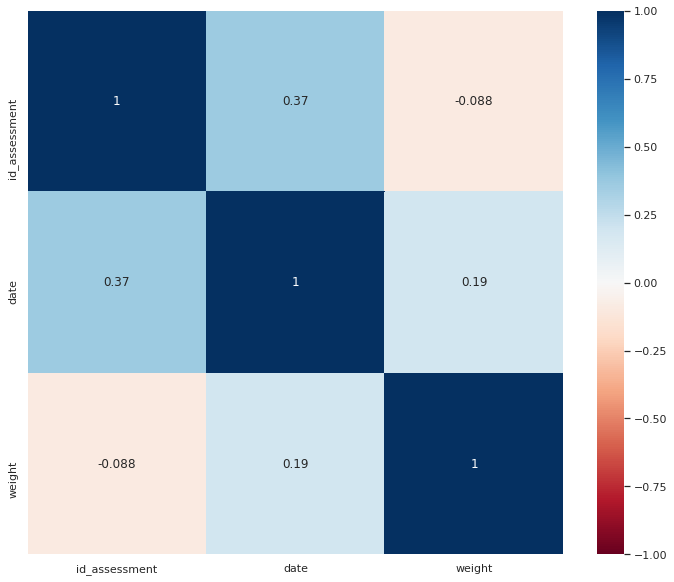

In [3]:
print('DESCRIBE')
print(assessments_df.describe(include='all'))
# show all rows containing NANs
# df.iloc[df.isna().any(1).array]
print('INFO')
print(assessments_df.info())
print('UNIQUE VALUES COUNT')
print(assessments_df.nunique().sort_values())
print('\n code_module frequencies')
print(assessments_df['code_module'].value_counts(dropna=False))
print('\n code_presentation frequencies')
print(assessments_df['code_presentation'].value_counts(dropna=False))
print('\n assessment_type frequencies')
print(assessments_df['assessment_type'].value_counts(dropna=False))
print('THE SKEW')
print(assessments_df.skew().sort_values())
print('THE KURTOSIS')
print(assessments_df.kurt().sort_values())
# n = len(assessments_df['date'])
# series = assessments_df['date']
# (((n*(n-1))**0.5)/(n-2)) * ((series - series.mean()) ** 3).mean() / series.std(ddof=0)**3
# I DONT KNOW HOW THE SKEWNESS IS CALCULATED!
plt.figure(figsize = (12,10))
sns.heatmap(assessments_df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()


In [4]:
courses_df = pd.read_csv('./OULAD/courses.csv')
courses_df.head(15)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [5]:
print('DESCRIBE')
print(courses_df.describe(include='all'))
print('INFO')
print(courses_df.info())
print('UNIQUE VALUES COUNT')
print(courses_df.nunique().sort_values())
print('\n code_module frequencies')
print(courses_df['code_module'].value_counts(dropna=False))
print('\n code_presentation frequencies')
print(courses_df['code_presentation'].value_counts(dropna=False))
print('\n module_presentation_length frequencies')
print(courses_df['module_presentation_length'].value_counts(dropna=False))

DESCRIBE
       code_module code_presentation  module_presentation_length
count           22                22                   22.000000
unique           7                 4                         NaN
top            DDD             2014J                         NaN
freq             4                 7                         NaN
mean           NaN               NaN                  255.545455
std            NaN               NaN                   13.654677
min            NaN               NaN                  234.000000
25%            NaN               NaN                  241.000000
50%            NaN               NaN                  261.500000
75%            NaN               NaN                  268.000000
max            NaN               NaN                  269.000000
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      -------------- 

In [6]:
studentAssessment_df = pd.read_csv('./OULAD/studentAssessment.csv')
studentAssessment_df.head(15)
# score sometimes NaN - not even tried?
# we can't replace those with 0 as it would mean they tried and scored 0 which is different...
# may be -0.01?
# studentAssessment_df.iloc[studentAssessment_df.isna().any(1).array]
# studentAssessment_df.aggregate(lambda x: x.isna().sum())

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
5,1752,45462,20,0,70.0
6,1752,45642,18,0,72.0
7,1752,52130,19,0,72.0
8,1752,53025,9,0,71.0
9,1752,57506,18,0,68.0


DESCRIBE
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
-

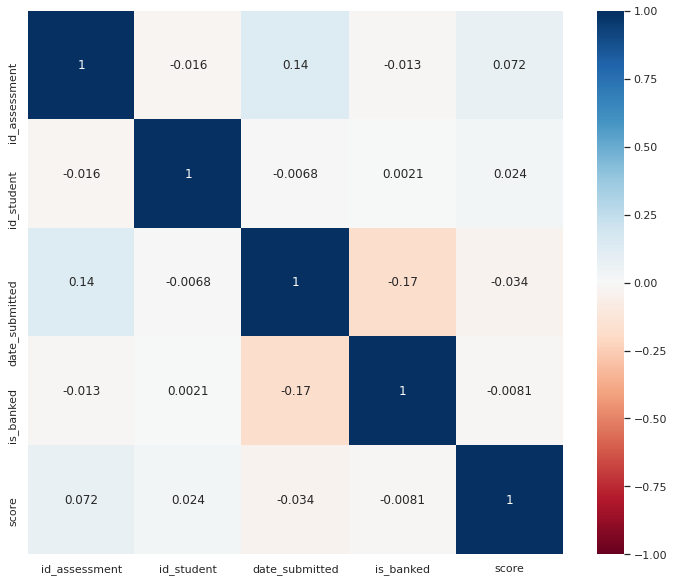

In [7]:
print('DESCRIBE')
print(studentAssessment_df.describe(include='all'))
print('INFO')
print(studentAssessment_df.info())
print('UNIQUE VALUES COUNT')
print(studentAssessment_df.nunique().sort_values())
print('\n is_banked frequencies')
print(studentAssessment_df['is_banked'].value_counts(dropna=False))
plt.figure(figsize = (12,10))
sns.heatmap(studentAssessment_df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()


In [8]:
studentInfo_df = pd.read_csv('./OULAD/studentInfo.csv')
studentInfo_df.head(10)
# 1/3 of imd_badn is NaN
# replaced now with 0-100%
# studentInfo_df.iloc[studentInfo_df.isna().any(1).array]
# studentInfo_df.aggregate(lambda x: x.isna().sum())
description_features = ['imd_band']
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='0-100%')
studentInfo_df[description_features] = imp.fit_transform(studentInfo_df[description_features])
studentInfo_df.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,0-100%,55<=,0,60,N,Pass


DESCRIBE
       code_module code_presentation    id_student gender    region  \
count        32593             32593  3.259300e+04  32593     32593   
unique           7                 4           NaN      2        13   
top            BBB             2014J           NaN      M  Scotland   
freq          7909             11260           NaN  17875      3446   
mean           NaN               NaN  7.066877e+05    NaN       NaN   
std            NaN               NaN  5.491673e+05    NaN       NaN   
min            NaN               NaN  3.733000e+03    NaN       NaN   
25%            NaN               NaN  5.085730e+05    NaN       NaN   
50%            NaN               NaN  5.903100e+05    NaN       NaN   
75%            NaN               NaN  6.444530e+05    NaN       NaN   
max            NaN               NaN  2.716795e+06    NaN       NaN   

            highest_education imd_band age_band  num_of_prev_attempts  \
count                   32593    32593    32593          32593.00

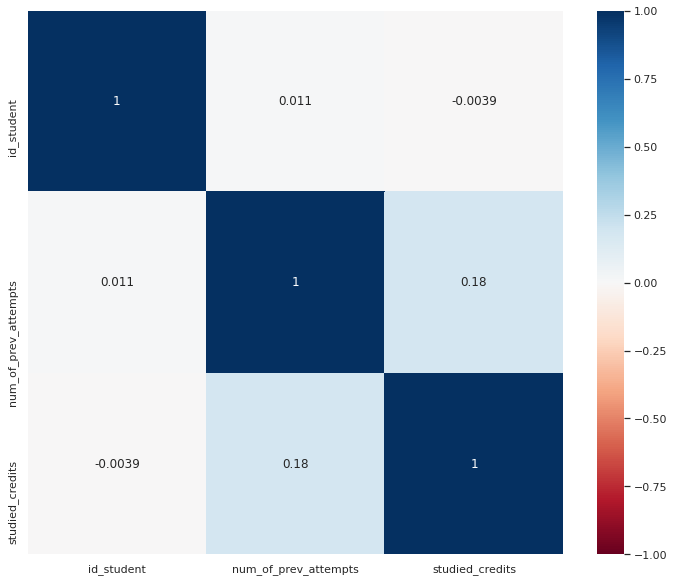

In [9]:
print('DESCRIBE')
print(studentInfo_df.describe(include='all'))
print('INFO')
print(studentInfo_df.info())
print('UNIQUE VALUES COUNT')
print(studentInfo_df.nunique().sort_values())

print('\n gender frequencies')
print(studentInfo_df['gender'].value_counts(dropna=False))
print('\n disability frequencies')
print(studentInfo_df['disability'].value_counts(dropna=False))
print('\n age_band frequencies')
print(studentInfo_df['age_band'].value_counts(dropna=False))
print('\n code_presentation frequencies')
print(studentInfo_df['code_presentation'].value_counts(dropna=False))
print('\n final_result frequencies')
print(studentInfo_df['final_result'].value_counts(dropna=False))
print('\n highest_education frequencies')
print(studentInfo_df['highest_education'].value_counts(dropna=False))
print('\n code_module frequencies')
print(studentInfo_df['code_module'].value_counts(dropna=False))
print('\n num_of_prev_attempts frequencies')
print(studentInfo_df['num_of_prev_attempts'].value_counts(dropna=False))
print('\n imd_band frequencies')
print(studentInfo_df['imd_band'].value_counts(dropna=False))
print('\n region frequencies')
print(studentInfo_df['region'].value_counts(dropna=False))
print('\n studied_credits frequencies')
print(studentInfo_df['studied_credits'].value_counts(dropna=False))
plt.figure(figsize = (12,10))
sns.heatmap(studentInfo_df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [10]:
studentRegistration_df = pd.read_csv('./OULAD/studentRegistration.csv')
studentRegistration_df.head(15)
# 2/3 of date_unregistration is NaN - they dont unRegistered!
# Is it common to unregister at the verry end of the course? If not we can replace the NaNs 
# with the end date of the course!
# 45 date_registration is NaN - no Idea why...
# studentRegistration_df.iloc[studentRegistration_df.isna().any(1).array]
# studentRegistration_df.aggregate(lambda x: x.isna().sum())

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
5,AAA,2013J,38053,-110.0,NaN
6,AAA,2013J,45462,-67.0,NaN
7,AAA,2013J,45642,-29.0,NaN
8,AAA,2013J,52130,-33.0,NaN
9,AAA,2013J,53025,-179.0,NaN


DESCRIBE
       code_module code_presentation    id_student  date_registration  \
count        32593             32593  3.259300e+04       32548.000000   
unique           7                 4           NaN                NaN   
top            BBB             2014J           NaN                NaN   
freq          7909             11260           NaN                NaN   
mean           NaN               NaN  7.066877e+05         -69.411300   
std            NaN               NaN  5.491673e+05          49.260522   
min            NaN               NaN  3.733000e+03        -322.000000   
25%            NaN               NaN  5.085730e+05        -100.000000   
50%            NaN               NaN  5.903100e+05         -57.000000   
75%            NaN               NaN  6.444530e+05         -29.000000   
max            NaN               NaN  2.716795e+06         167.000000   

        date_unregistration  
count          10072.000000  
unique                  NaN  
top                     

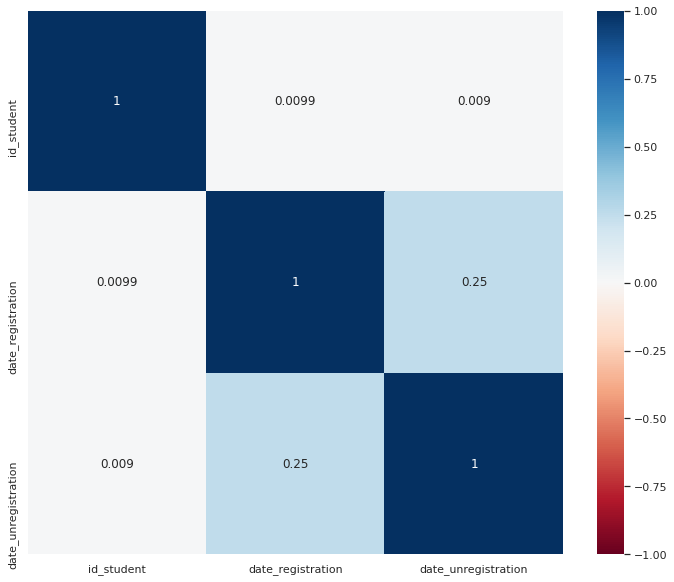

In [11]:
print('DESCRIBE')
print(studentRegistration_df.describe(include='all'))
print('INFO')
print(studentRegistration_df.info())
print('UNIQUE VALUES COUNT')
print(studentRegistration_df.nunique().sort_values())
print('\n code_presentation frequencies')
print(studentRegistration_df['code_presentation'].value_counts(dropna=False))
print('\n code_module frequencies')
print(studentRegistration_df['code_module'].value_counts(dropna=False))
plt.figure(figsize = (12,10))
sns.heatmap(studentRegistration_df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [12]:
studentVle_df = pd.read_csv('./OULAD/studentVle.csv')
studentVle_df.head(15)
# studentVle_df.iloc[studentVle_df.isna().any(1).array]
# studentVle_df.aggregate(lambda x: x.isna().sum())

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
5,AAA,2013J,28400,546652,-10,8
6,AAA,2013J,28400,546876,-10,2
7,AAA,2013J,28400,546688,-10,15
8,AAA,2013J,28400,546662,-10,17
9,AAA,2013J,28400,546890,-10,1


DESCRIBE
       code_module code_presentation    id_student       id_site  \
count     10655280          10655280  1.065528e+07  1.065528e+07   
unique           7                 4           NaN           NaN   
top            FFF             2014J           NaN           NaN   
freq       4014499           3619452           NaN           NaN   
mean           NaN               NaN  7.333336e+05  7.383234e+05   
std            NaN               NaN  5.827060e+05  1.312196e+05   
min            NaN               NaN  6.516000e+03  5.267210e+05   
25%            NaN               NaN  5.077430e+05  6.735190e+05   
50%            NaN               NaN  5.882360e+05  7.300690e+05   
75%            NaN               NaN  6.464840e+05  8.770300e+05   
max            NaN               NaN  2.698588e+06  1.049562e+06   

                date     sum_click  
count   1.065528e+07  1.065528e+07  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN      

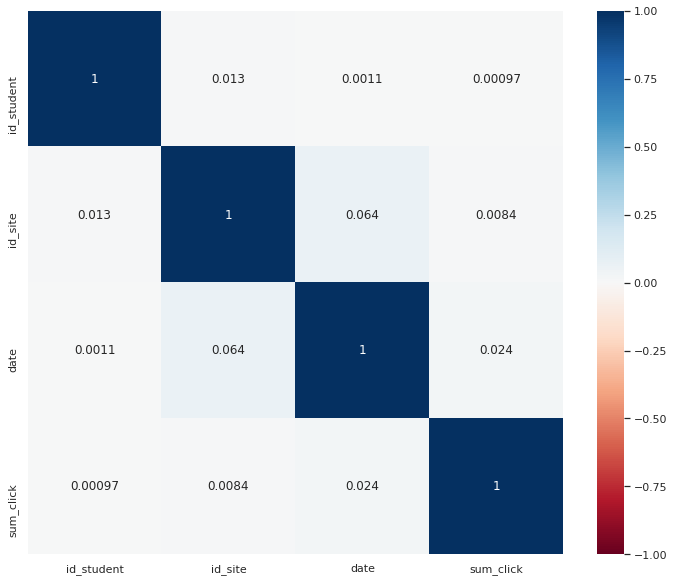

In [13]:
print('DESCRIBE')
print(studentVle_df.describe(include='all'))
print('INFO')
print(studentVle_df.info())
print('UNIQUE VALUES COUNT')
print(studentVle_df.nunique().sort_values())
print('\n code_presentation frequencies')
print(studentVle_df['code_presentation'].value_counts(dropna=False))
print('\n code_module frequencies')
print(studentVle_df['code_module'].value_counts(dropna=False))
plt.figure(figsize = (12,10))
sns.heatmap(studentVle_df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [14]:
vle_df = pd.read_csv('./OULAD/vle.csv')
vle_df.head(15)
# 5243 of week_from week_to is NaN = planed availability from start to end
# we could replace week_from with 0 and week_to with end date of the course
# vle_df.iloc[vle_df.isna().any(1).array]
# vle_df.aggregate(lambda x: x.isna().sum())

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
5,546614,AAA,2013J,homepage,NaN,NaN
6,546897,AAA,2013J,url,NaN,NaN
7,546678,AAA,2013J,oucontent,NaN,NaN
8,546933,AAA,2013J,resource,NaN,NaN
9,546708,AAA,2013J,oucontent,NaN,NaN


DESCRIBE
             id_site code_module code_presentation activity_type    week_from  \
count   6.364000e+03        6364              6364          6364  1121.000000   
unique           NaN           7                 4            20          NaN   
top              NaN         FFF             2013J      resource          NaN   
freq             NaN        1967              1772          2660          NaN   
mean    7.260991e+05         NaN               NaN           NaN    15.204282   
std     1.283151e+05         NaN               NaN           NaN     8.792865   
min     5.267210e+05         NaN               NaN           NaN     0.000000   
25%     6.615928e+05         NaN               NaN           NaN     8.000000   
50%     7.300965e+05         NaN               NaN           NaN    15.000000   
75%     8.140162e+05         NaN               NaN           NaN    22.000000   
max     1.077905e+06         NaN               NaN           NaN    29.000000   

            week_t

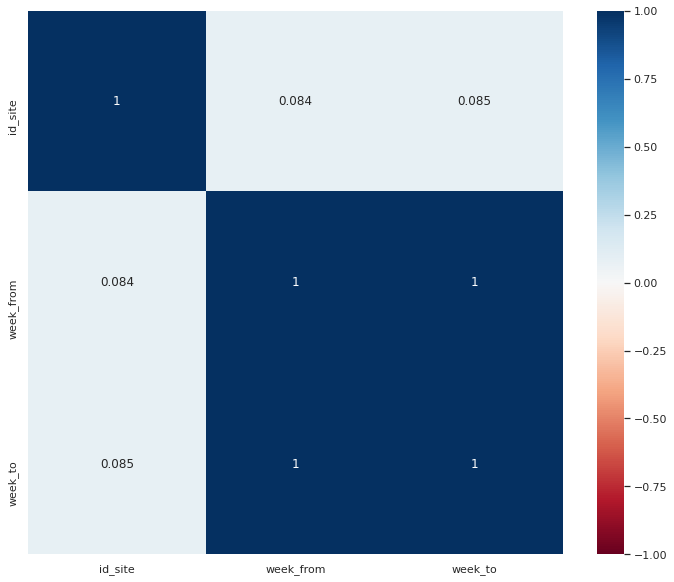

In [15]:
print('DESCRIBE')
print(vle_df.describe(include='all'))
print('INFO')
print(vle_df.info())
print('UNIQUE VALUES COUNT')
print(vle_df.nunique().sort_values())
print('\n code_presentation frequencies')
print(vle_df['code_presentation'].value_counts(dropna=False))
print('\n code_module frequencies')
print(vle_df['code_module'].value_counts(dropna=False))
print('\n activity_type frequencies')
print(vle_df['activity_type'].value_counts(dropna=False))
plt.figure(figsize = (12,10))
sns.heatmap(vle_df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

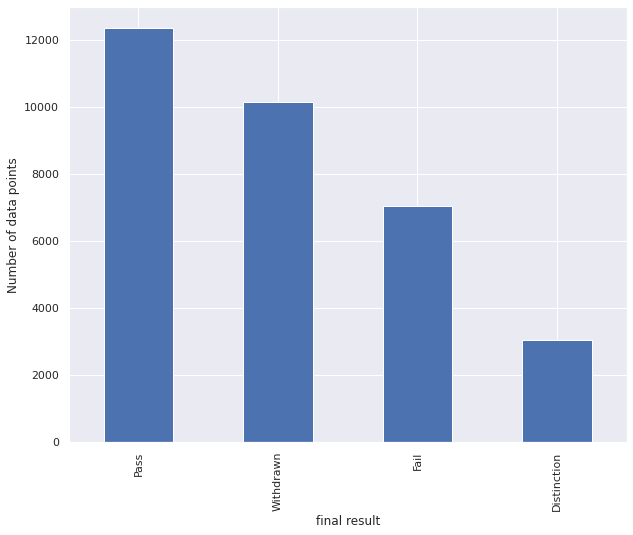

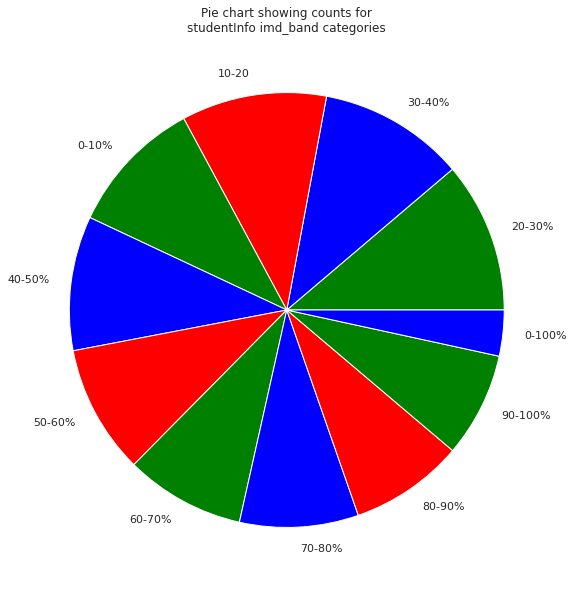

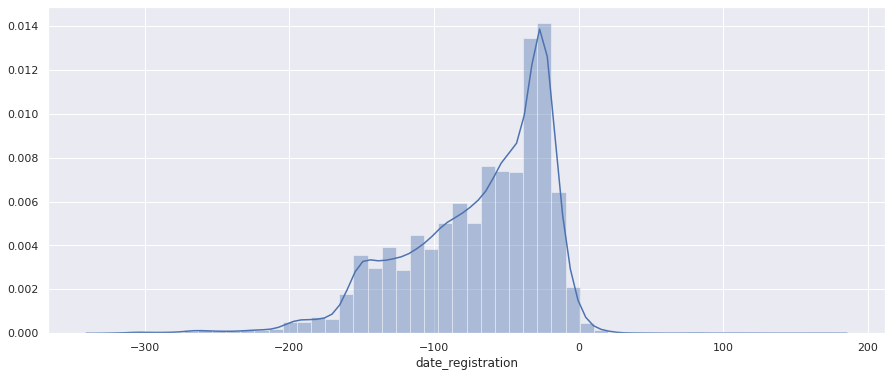

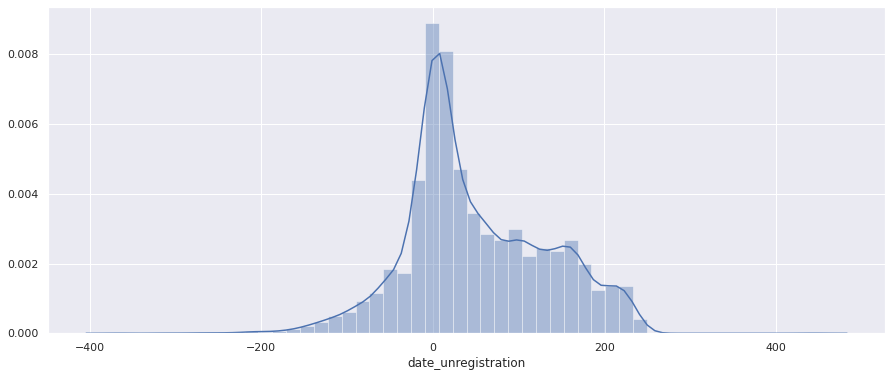

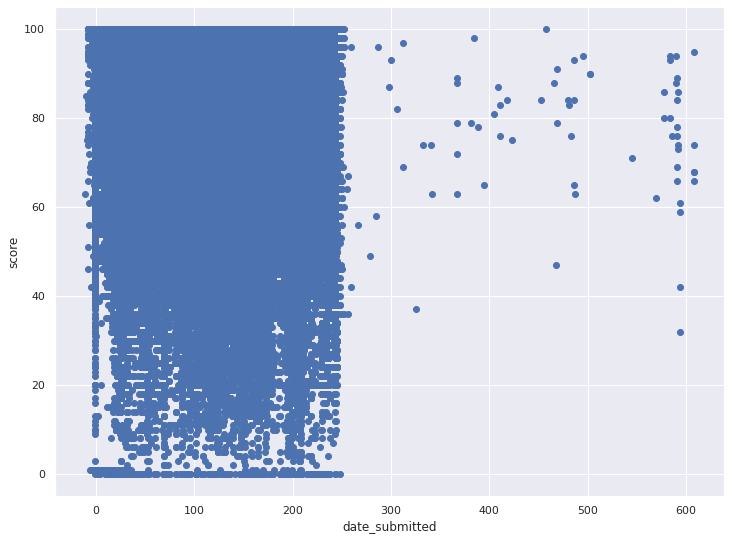

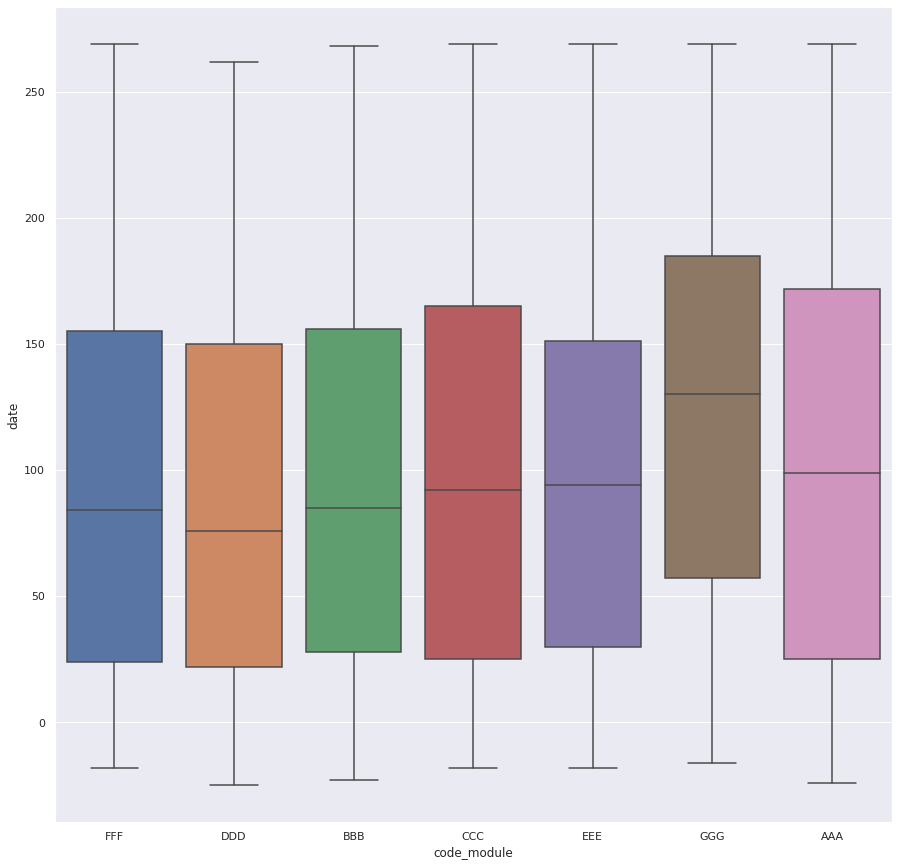

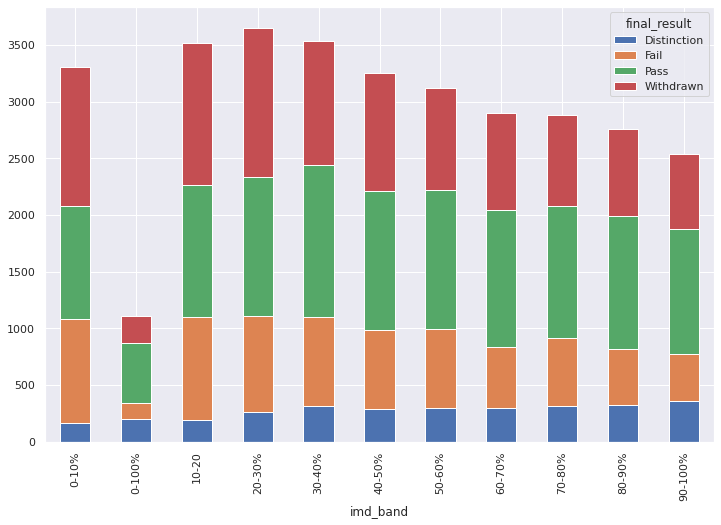

In [16]:
# print('some tests... TODO REMOVE THIS!')
# courses_df['code_module']
courses_df[['code_module', 'code_presentation']]
courses_df.iloc[[0, 1, 2]] # first 3 rows
courses_df.columns
courses_df[courses_df.columns[1:2]]
len(courses_df)
courses_df.iloc[0]['code_module']
courses_df['code_presentation'][courses_df['code_module'] == 'AAA']
courses_df[courses_df['code_module'] == 'AAA'][['code_presentation', 'code_module']]
type(courses_df.describe())
courses_df.groupby('code_module').agg(np.mean) # mean of module_presentation len by code_module
# example of groupby of 2 columns df.groupby(['Sex', 'Embarked'])
# first group value by code_module, + mean + standard deviation
courses_df.groupby('code_module').agg({
    'code_presentation': lambda x: x.values[0],
    'module_presentation_length': [np.mean, np.std]
})
# df.dropna() to drop the NaNs
# df_oversample = df.append(df.iloc[0]) to add a column

# the nullity matrix:
# data = vle_df
# mask = data.isna()
# nullable_columns = data.columns[mask.any()].tolist()
# msno.matrix(data[nullable_columns])
# plt.show() # black is non-null / white is null
# msno.heatmap(data[nullable_columns], figsize=(18,18))
# plt.show()

plt.figure(figsize=(10,8))
# data.flag_tsunami.value_counts().plot(kind='bar')
studentInfo_df['final_result'].value_counts().plot(kind='bar')
plt.ylabel('Number of data points')
plt.xlabel('final result')
plt.show()

counts = studentInfo_df['imd_band'].value_counts()
# counts = counts.sort()
plt.figure(figsize=(10,10))
plt.pie(counts, labels=counts.index, colors=['green', 'blue', 'red'])
plt.title('Pie chart showing counts for\nstudentInfo imd_band categories')
plt.show()

plt.figure(figsize=(15,6))
sns.distplot(studentRegistration_df['date_registration'])
plt.show()
plt.figure(figsize=(15,6))
sns.distplot(studentRegistration_df['date_unregistration'])
plt.show()

plt.figure(figsize=(12,9))
plt.scatter(x=studentAssessment_df['date_submitted'], y=studentAssessment_df['score'])
plt.xlabel('date_submitted')
plt.ylabel('score')
plt.show()

# plt.figure(figsize = (12,10))
# sns.pairplot(assessments_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()
# plt.figure(figsize = (12,10))
# sns.pairplot(courses_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()
# plt.figure(figsize = (12,10))
# sns.pairplot(studentAssessment_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()
# plt.figure(figsize = (12,10))
# sns.pairplot(studentInfo_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()
# plt.figure(figsize = (12,10))
# sns.pairplot(studentRegistration_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()
# plt.figure(figsize = (12,10))
# sns.pairplot(studentVle_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()
# plt.figure(figsize = (12,10))
# sns.pairplot(vle_df.corr(), kind='scatter', diag_kind='kde')
# plt.show()

# assessments_df
# courses_df
# studentAssessment_df
# studentInfo_df
# studentRegistration_df
# studentVle_df
# vle_df

plt.figure(figsize=(15, 15))
sns.boxplot(
    x='code_module', y="date",
    data=studentVle_df, order=studentVle_df['code_module'].value_counts().index)
plt.show()

sns.set()
studentInfo_df.groupby(['imd_band','final_result']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,8))
plt.show()

### Linear Regression
note - we have students that have both - succeed and failed if we don't groupby session

In [17]:
from sklearn.linear_model import LinearRegression
x = np.array([[1,1],[1,2],[2,2],[2,3]])
print('x =', x)
y = np.dot(x, np.array([1,2])) + 3
print('y =', y)
reg = LinearRegression().fit(x,y)
print(reg)
print('m = ', reg.coef_)
print('c = ', reg.intercept_)
reg.predict([[10,4]])

# studentAssessment_df
# studentInfo_df
# on id_student
data = pd.merge(studentAssessment_df, studentInfo_df, on="id_student")
data.groupby(['id_student', 'final_result']).count().sort_values(by="id_assessment")
data

x = [[1 1]
 [1 2]
 [2 2]
 [2 3]]
y = [ 6  8  9 11]
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
m =  [1. 2.]
c =  3.0000000000000018


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,1752,11391,18,0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,1753,11391,53,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
2,1754,11391,115,0,80.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
3,1755,11391,164,0,85.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
4,1756,11391,212,0,82.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207314,37439,573320,227,0,80.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail
207315,37440,573320,227,0,100.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail
207316,37441,573320,227,0,100.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail
207317,37442,573320,227,0,20.0,GGG,2014J,F,South East Region,Lower Than A Level,80-90%,35-55,0,30,N,Fail


In [18]:
# assessments_df
# courses_df
# studentAssessment_df
# studentInfo_df
# studentRegistration_df
# studentVle_df
# vle_df

# we take only code_module == 'AAA' and code_presentation 2013J
code_module = 'CCC'
code_presentation = '2014B'
course = courses_df[ (courses_df['code_module'] == code_module) & (courses_df['code_presentation'] == code_presentation)]

# studentAssessment = complete studentAssessments with assessments info
assessments = assessments_df[(assessments_df['code_module'] == code_module) & (assessments_df['code_presentation'] == code_presentation)]
assessments.loc[(assessments['assessment_type'] == 'Exam'), 'date'] = course['module_presentation_length'].values[0]
studentAssessment = pd.merge(studentAssessment_df, assessments, how='inner', on='id_assessment')
studentAssessment

# studentInfo = complete studentInfo with studentRegistration
studentRegistration = studentRegistration_df[(studentRegistration_df['code_module'] == code_module) & (studentRegistration_df['code_presentation'] == code_presentation)]
studentRegistration.loc[studentRegistration['date_unregistration'].isna(),'date_unregistration'] = course['module_presentation_length'].values[0]
studentInfo = pd.merge(studentInfo_df, studentRegistration, how='inner', on=['id_student', 'code_module', 'code_presentation'])

# studentVle = complete vle with studentVle
vle = vle_df[(vle_df['code_module'] == code_module) & (vle_df['code_presentation'] == code_presentation)]
del vle['week_from']
del vle['week_to']
studentVle = pd.merge(studentVle_df, vle, how='inner', on=['id_site', 'code_module', 'code_presentation'])
del studentVle['id_site']
# complete with studentVle with studentInfo, complete studentAssessment with studentInfo
# then append enhanced studentVle with studentAssessment, sort by date and groupby id_student
studentVleInfo = pd.merge(studentVle, studentInfo, how='inner', on=['id_student', 'code_module', 'code_presentation'])
studentAssessmentInfo = pd.merge(studentAssessment, studentInfo, how='inner', on=['id_student', 'code_presentation', 'code_module'])
combined_df = studentAssessmentInfo.append(studentVleInfo)
del combined_df['code_module']
del combined_df['code_presentation']
del combined_df['id_assessment']
combined_df = combined_df.sort_values(by=['date'])
combined_df.groupby('id_student', group_keys=False).get_group(28418)
# assessmentByStudent = studentAssessment.groupby('id_student') # groups # get_group(x)

/home/katzenmaul/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id_student,date_submitted,is_banked,score,assessment_type,date,weight,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,sum_click,activity_type
490463,28418,NaN,NaN,NaN,NaN,-5.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,homepage
490541,28418,NaN,NaN,NaN,NaN,4.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,resource
490546,28418,NaN,NaN,NaN,NaN,4.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,resource
490502,28418,NaN,NaN,NaN,NaN,4.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,2.0,subpage
490490,28418,NaN,NaN,NaN,NaN,4.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,subpage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490584,28418,NaN,NaN,NaN,NaN,141.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,resource
490582,28418,NaN,NaN,NaN,NaN,141.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,resource
490572,28418,NaN,NaN,NaN,NaN,141.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,resource
490483,28418,NaN,NaN,NaN,NaN,165.0,NaN,F,West Midlands Region,A Level or Equivalent,20-30%,0-35,0,30,N,Fail,-37.0,241.0,1.0,homepage


#### plan
- combined_df might be good for algorithms that take into account the sequence / time
- to make a first POC I will simplify drasticaly
    - remove every thing that is beyond day 14
    - aggregate each student sequence to make for each student contain only one row
        - date_submitted (ignore NaNs) then take mean of that OK
        - same with date, mean score OK
        - is_banked (ignore NaNs) take sum (= how many assessments were banked) OK
        - same with score OK
        - assessment_type make 2 variables: sumTMA -> sum of TMAs / sumCMA -> sum of CMAs OK
        - for each activity type make a variable and take the sum of sum_click 

In [19]:
# prediction is only then interresting when it's the begining of the course - not the end!
first14Days_combined_df = combined_df[combined_df['date'] < 14]
# remove those who unregistered before the begining as we can't do anything for them
first14Days_combined_df = combined_df[combined_df['date_unregistration'] > 0]
# list of unique activity_types to create features
activity_types_df = first14Days_combined_df['activity_type'].unique()
# remove NaN activity type
activity_types_df = [x for x in activity_types_df if type(x) == str]
# we want one student per line (the easy way)
final_df = first14Days_combined_df.groupby('id_student').agg({
    'score': [np.mean, np.sum],
    'date_submitted': [np.mean],
    'is_banked': [np.sum],
    'assessment_type': [('CMA_count', lambda x: x.values[x.values == 'CMA'].size), ('TMA_count', lambda x: x.values[x.values == 'TMA'].size)],
    'date':[np.mean],
    'weight': [np.mean, np.sum],
    'gender': [('first', lambda x: x.values[0])],
    'region': [('first', lambda x: x.values[0])],
    'highest_education': [('first', lambda x: x.values[0])],
    'imd_band': [('first', lambda x: x.values[0])],
    'age_band': [('first', lambda x: x.values[0])],
    'num_of_prev_attempts': [('first', lambda x: x.values[0])],
    'studied_credits': [('first', lambda x: x.values[0])],
    'disability': [('first', lambda x: x.values[0])],
    'final_result': [('first', lambda x: x.values[0])],
    'date_registration': [('first', lambda x: x.values[0])],
    'date_unregistration': [('first', lambda x: x.values[0])],
    'sum_click': [np.mean, np.sum],
    'activity_type': [('list', lambda x: [x.values[x.values == activity].size for activity in activity_types_df])]
})
# keeping only one level of columns names
final_df.columns = ["_".join(x) for x in final_df.columns.ravel()]
custom_columns = ['activity_type_' + str(x) for x in activity_types_df]
# splitting & concatenating the created features (there should be a better way to do it but I'm tired...)
final_df = final_df.join(pd.DataFrame(final_df.activity_type_list.values.tolist(), columns=custom_columns, index=final_df.index))
del final_df['activity_type_list']

# replacing NaNs
final_df.loc[final_df['weight_mean'].isna(), 'weight_mean'] = 0
final_df.loc[final_df['score_mean'].isna(), 'score_mean'] = 0
final_df.loc[final_df['date_submitted_mean'].isna(), 'date_submitted_mean'] = -1


# we can use also: final_df['weight_mean'].fillna(final_df.mean(), inplace=True)

# replacing categorical_columns with numbers
categorical_columns = ['gender_first', 'highest_education_first', 'imd_band_first', 'age_band_first', 'disability_first', 'final_result_first', 'region_first']

encoders = {col: LabelEncoder() for col in categorical_columns }
for col in categorical_columns:
    final_df.loc[:, col] = encoders[col].fit_transform(final_df[col])
    
    
# to check that we don't have NaNs!
# final_df.aggregate(lambda x: x.isna().sum())
# print(final_df.isna().sum())

# print(final_df)
print(final_df.describe(include='all'))
print('REGION REPARTITION')
print(final_df.groupby('region_first').size())
print('EDUCATION REPARTITION')
print(final_df.groupby('highest_education_first').size())
print('FINAL RESULT REPARTITION')
print(final_df['final_result_first'].value_counts())


        score_mean    score_sum  date_submitted_mean  is_banked_sum  \
count  1613.000000  1613.000000          1613.000000         1613.0   
mean     54.819519   328.828270            77.015323            0.0   
std      30.881734   288.348841            52.866396            0.0   
min       0.000000     0.000000            -1.000000            0.0   
25%      33.222222    50.000000            20.000000            0.0   
50%      62.000000   268.000000            85.500000            0.0   
75%      80.000000   582.000000           128.000000            0.0   
max     100.000000   900.000000           165.000000            0.0   

       assessment_type_CMA_count  assessment_type_TMA_count    date_mean  \
count                1613.000000                1613.000000  1613.000000   
mean                    2.425294                   1.748915    64.578936   
std                     1.530145                   1.726546    44.609095   
min                     0.000000                   0.000

In [20]:
# sns.countplot(final_df['final_result_first'],label="Count")
# plt.show()
# final_df.drop(['region_first', 'highest_education_first', 'final_result_first'], axis=1)\
#     .plot(kind='box', subplots=True, layout=(8,3),\
#           sharex=False, sharey=False, figsize=(12,30), title='Box Plot for each input variable')
# plt.show()

# final_df.drop(['region_first', 'highest_education_first', 'final_result_first'] ,axis=1)\
#     .hist(bins=30, figsize=(20,30))
# pl.suptitle("Histogram for each numeric input variable")
# plt.show()

from pandas.plotting import scatter_matrix
from matplotlib import cm
X = final_df.drop(['region_first', 'highest_education_first', 'final_result_first'] ,axis=1)
y = final_df['final_result_first'].astype('category').cat.codes
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(60,60), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig("save_file_name.pdf")
plt.close()

/home/katzenmaul/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/katzenmaul/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/katzenmaul/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


#### now the fun part begins, let's do some clustering :)

In [21]:

# IDEA:
# imagine the course just started - we are at week 2
# we want to identify students which might Fail/Withdraw to propose them help
# to start of simple we don't try to predict WHEN a student will Fail/Withdraw
#    and we ignore all student interactions with other courses
# we suppose that students that Fail/Withdraw can be distinguished by their behaviour and features
# but we don't know which ones in advance
# with clustering we can identify groups of student that are similar
# we suppose that students that have similar behaviour / features would have similar outcomes

# we want to measure if the resulting groups could provide useful information
# for a set of prediction algorithms thereby improving their predictions 

# how does the quality of the generated groups impact the predictors?

# could the consensus clustering algorithm produce an even better set of groups to improve
#    even more the prediction?
# how does the clustering algorithms generalise for differenes courses / the same course 
#    the next year?
# if each time the optimal hyper params are different - could the consensus clustering 
#    algorithm solve this issue by combining multiple choices of hyper params at the same time?

    
# another solution would be to cluster a previous course (training) and use the current one for
#   prediction ... for now we want just to measure the clustering quality on all
#   the data
# train, test = train_test_split(final_df, random_state=0)
scaler = MinMaxScaler()
trainX = final_df.drop(['final_result_first'], axis=1)
trainX = scaler.fit_transform(trainX)
testY = final_df['final_result_first']

In [28]:
kMedoidsParams = {
    'vanilla' : {},
    # removing to improve performances
#     'init=k-medoids++': {'init': 'k-medoids++'},
#     'metric=l1': {'metric': 'l1'},
#     'metric=l2': {'metric': 'l2'},
#     'metric=manhattan': {'metric': 'manhattan'}
}

kmeansParams = {
    'vanilla' : {},
    'n_init30' : {'n_init': 30},
    'max_iter=400': {'max_iter': 400},
    'max_iter=600': {'max_iter': 600},
    'max_iter=400 tol=5': {'max_iter': 400, 'tol': 1e-5},
    'max_iter=600 tol=5': {'max_iter': 600, 'tol': 1e-5},
    'max_iter=400 tol=6': {'max_iter': 400, 'tol': 1e-6},
    'max_iter=600 tol=6': {'max_iter': 600, 'tol': 1e-6},
    'n_init15 max_iter=400' : {'n_init': 15, 'max_iter': 400},
    'n_init15 max_iter=600' : {'n_init': 15, 'max_iter': 600},
#     'tol=5': {'tol': 1e-5},
#     'tol=6': {'tol': 1e-6},
#     'n_init15' : {'n_init': 15},
#     'n_init60' : {'n_init': 60},
#     'max_iter=800': {'max_iter': 800},
#     'max_iter=800 tol=5': {'max_iter': 800, 'tol': 1e-5},
#     'max_iter=800 tol=6': {'max_iter': 800, 'tol': 1e-6},
#     'n_init15 max_iter=800' : {'n_init': 15, 'max_iter': 800},
#     'n_init30 max_iter=400' : {'n_init': 30, 'max_iter': 400},
#     'n_init30 max_iter=600' : {'n_init': 30, 'max_iter': 600},
#     'n_init30 max_iter=800' : {'n_init': 30, 'max_iter': 800},
#     'n_init60 max_iter=400' : {'n_init': 60, 'max_iter': 400},
#     'n_init60 max_iter=600' : {'n_init': 60, 'max_iter': 600},
#     'n_init60 max_iter=800' : {'n_init': 60, 'max_iter': 800},
}

spectralClusteringParams = {
    # removing to improve performance
    'vanilla' : {},
#     'eigen_solver=arpack': {'eigen_solver': 'arpack'},
#     'eigen_solver=amg': {'eigen_solver': 'amg'},
#     'assign_labels=discretize': {'assign_labels': 'discretize'},
    'affinity=laplacian': {'affinity': 'laplacian'},
#     'eigen_solver=lobpcg': {'eigen_solver': 'lobpcg'}, # not working for k>=6
}

agglomerativeClusteringParams = {
    'vanilla' : {},
    
    # removing to improve performance
#     'linkage=average affinity=l1' : {'linkage': 'average', 'affinity': 'l1'},
#     'linkage=average affinity=manhattan' : {'linkage': 'average', 'affinity': 'manhattan'},
    
    # removing because of low results
#     'linkage=complete' : {'linkage': 'complete'},
#     'linkage=average' : {'linkage': 'average'},
#     'linkage=single' : {'linkage': 'single'},
#     'linkage=complete affinity=l1' : {'linkage': 'complete', 'affinity': 'l1'},
#     'linkage=single affinity=l1' : {'linkage': 'single', 'affinity': 'l1'},
#     'linkage=complete affinity=l2' : {'linkage': 'complete', 'affinity': 'l2'},
#     'linkage=average affinity=l2' : {'linkage': 'average', 'affinity': 'l2'},
#     'linkage=single affinity=l2' : {'linkage': 'single', 'affinity': 'l2'},
#     'linkage=complete affinity=manhattan' : {'linkage': 'complete', 'affinity': 'manhattan'},
#     'linkage=single affinity=manhattan' : {'linkage': 'single', 'affinity': 'manhattan'},
#     'linkage=complete affinity=cosine' : {'linkage': 'complete', 'affinity': 'cosine'},
#     'linkage=average affinity=cosine' : {'linkage': 'average', 'affinity': 'cosine'},
#     'linkage=single affinity=cosine' : {'linkage': 'single', 'affinity': 'cosine'},
}

birchParams = {
    'vanilla': {},
}

dbscanParams = {
    'vanilla': {},
}

clustAlgos = {
#     "kMeans": {'obj': KMeans, 'params': kmeansParams},
#     "kMedoits": {'obj': KMedoids, 'params': kMedoidsParams},
    "SpectralClustering": {'obj': SpectralClustering, 'params': spectralClusteringParams},
    "AgglomerativeClustering": {'obj': AgglomerativeClustering, 'params': agglomerativeClusteringParams},
#     "Birch": {'obj': Birch, 'params': birchParams},
    
#     "DBSCAN": {'obj': DBSCAN, 'params': dbscanParams}, # density based - don't use nb_clusters
}

results = pd.DataFrame(columns=['k', 'algo', 'type', 'score'])
max_clusters = 3
min_clusters = 2
stepCount = 0
totalStepsCount = (max_clusters - min_clusters) * sum([len(clustAlgos[key]['params']) for key in clustAlgos])
baseClusterings = pd.DataFrame(index=testY.index)

for clustAlgoKey in clustAlgos:
    clear_output(wait=True)
    for nb_clusters in range(min_clusters, max_clusters):
        clear_output(wait=True)
        for paramsKey in clustAlgos[clustAlgoKey]['params']:
            clear_output(wait=True)
            clustAlgos[clustAlgoKey]['params'][paramsKey]['n_clusters'] = nb_clusters
            clustAlgo = clustAlgos[clustAlgoKey]['obj'](**clustAlgos[clustAlgoKey]['params'][paramsKey])
            clustAlgo.fit(trainX)
            # we don't want to predict - for now only evaluate the quality of the clustering
            # clustAlgo_predict = pd.Series(clustAlgo.predict(trainX), name=clustAlgoKey, index=testY.index)
            clustAlgo_labels = pd.Series(clustAlgo.labels_, name=clustAlgoKey, index=testY.index)
            baseClusterings.insert(len(baseClusterings.columns), str(stepCount+1), clustAlgo_labels)
            new_col_list = encoders['final_result_first'].inverse_transform([0,1,2,3])
            compare_df = pd.concat([testY, clustAlgo_labels], axis=1)
            # bring back the final_result labels (not really needed but makes the code clearer)
            compare_df.loc[:,'final_result_first'] = encoders['final_result_first'].inverse_transform(compare_df.loc[:,'final_result_first'])
            compare_df = compare_df.groupby([clustAlgoKey, 'final_result_first']).size()
            
            # the adjusted_rand_score measure is good for measuring the quality of the cluster
            #   in general
            # print('adjusted_rand_score: ', adjusted_rand_score(testY, kmeans_labels))

            # but we want to measure how good the clustering algorithm is able to separate Distinction/Pass
            #  from Fail/Withdrawn:
            # the measure should be close or equal to 0 if both groups are almost equal or equal in size
            # should be close or equal to 1 if one of the groups is small compared to the other
            # should be between (0,1) if g1 > g2 / g1 < g2
            # proposed measure: score = abs(g1 - g2) / g1 + g2
            # we want to take into account the size of the groups too
            # we prefer 'big' groups with a good score rather than small groups with exellent scores
            # for that we could normalize the group score : score * group-size / total size
            # a perfect clustering would be one that has only 2 groups each of them of score 1
            # small groups would have a little weight compared to others but can sum up to 1
            # for now let try not to penalize by group count...
            scores = []
            for cluster in range(0,nb_clusters):
                failWihdrawn = compare_df[cluster]['Fail'] if 'Fail' in compare_df[cluster].index else 0
                failWihdrawn += compare_df[cluster]['Withdrawn'] if 'Withdrawn' in compare_df[cluster].index else 0
                PassDistinction = compare_df[cluster]['Pass'] if 'Pass' in compare_df[cluster].index else 0
                PassDistinction += compare_df[cluster]['Distinction'] if 'Distinction' in compare_df[cluster].index else 0
                scores.append(\
                    (abs(PassDistinction - failWihdrawn) / (PassDistinction + failWihdrawn)) *\
                              (PassDistinction + failWihdrawn) / len(trainX))

            results = results.append({'k': nb_clusters, 'algo': clustAlgoKey, 'type': paramsKey, 'score': sum(scores) }, ignore_index=True)
            stepCount += 1
            print('step ', stepCount, '/', totalStepsCount, '(', round(100 * stepCount/totalStepsCount,2), '%)', 'k=', nb_clusters)

            
nb_lines = 10
resultTable = pd.DataFrame(index=range(0,nb_lines))
for group in results.sort_values(by='score', ascending=False).groupby(['algo']):
    if len(group[1]) < nb_lines:
        group = (group[0], group[1].append([x for x in [0] * nb_lines]))
    
    resultTable.insert(len(resultTable.columns), "%s_k" % (group[0]), group[1].head(nb_lines)['k'].values)
    resultTable.insert(len(resultTable.columns), "%s_type" % (group[0]), group[1].head(nb_lines)['type'].values)
    resultTable.insert(len(resultTable.columns), "%s_score" % (group[0]), group[1].head(nb_lines)['score'].values)

print(baseClusterings)
resultTable

step  3 / 3 ( 100.0 %) k= 2
            1  2  3
id_student         
28418       0  0  0
29764       1  1  1
29820       1  1  1
40333       0  0  0
40604       1  1  1
...        .. .. ..
2681198     0  0  0
2686578     1  1  1
2692327     1  1  1
2697181     1  1  1
2698535     0  0  0

[1613 rows x 3 columns]


,AgglomerativeClustering_k,AgglomerativeClustering_type,AgglomerativeClustering_score,SpectralClustering_k,SpectralClustering_type,SpectralClustering_score
0,2,vanilla,0.890887,2,affinity=laplacian,0.83757
1,NaN,NaN,NaN,2,vanilla,0.83013
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


### MultiCons

In [23]:
# D= {1,2,3,4,5,6,7,8,9} partitioned using five base clusterings into the five partitions:
# P1 = {{1,2,3},{4,5,6,7,8,9}},
# P2 = {{1,2,3},{4,5,6,7,8,9}},
# P3 = {{1,2,3,4,5},{6,7},{8,9}},
# P4 = {{4,5,6,7}, {1,2,3},{8,9}}
# P5 = {{4,5,6,7},{1,2,3},{8,9}}

clust = pd.DataFrame(index=range(1,10))
membershipMatrix = pd.DataFrame(index=range(1,10))
clust.insert(len(clust.columns), '1', [0,0,0,1,1,1,1,1,1])
clust.insert(len(clust.columns), '2', [0,0,0,1,1,1,1,1,1])
clust.insert(len(clust.columns), '3', [0,0,0,0,0,1,1,2,2])
clust.insert(len(clust.columns), '4', [1,1,1,0,0,0,0,2,2])
clust.insert(len(clust.columns), '5', [1,1,1,0,0,0,0,2,2])
clust
# there should be a much better way to construct the membership matrix...
# for now let's use a naive implementation
# we dont need colDict
# colDict = {}
for col in clust.columns:
#     colDict[col] = []
    for partition in np.sort(clust[col].unique()):
#         colDict[col].append(partition)
        membershipMatrix.insert(len(membershipMatrix.columns), '%sP%i' % (col, partition), clust[col] == partition)
#     colDict[col].append(-1)
# colDict[col].pop()
membershipMatrix.astype(int)

,1P0,1P1,2P0,2P1,3P0,3P1,3P2,4P0,4P1,4P2,5P0,5P1,5P2
1,1,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,1,0,1,0,0,0,1,0,0,1,0
3,1,0,1,0,1,0,0,0,1,0,0,1,0
4,0,1,0,1,1,0,0,1,0,0,1,0,0
5,0,1,0,1,1,0,0,1,0,0,1,0,0
6,0,1,0,1,0,1,0,1,0,0,1,0,0
7,0,1,0,1,0,1,0,1,0,0,1,0,0
8,0,1,0,1,0,0,1,0,0,1,0,0,1
9,0,1,0,1,0,0,1,0,0,1,0,0,1


In [29]:
# test on a bigger dataset...
colDict = {}
membershipMatrix = pd.DataFrame(index=baseClusterings.index)
for col in baseClusterings.columns:
    colDict[col] = []
    for partition in np.sort(baseClusterings[col].unique()):
        colDict[col].append(partition)
        membershipMatrix.insert(len(membershipMatrix.columns), '%sP%i' % (col, partition), baseClusterings[col] == partition)
    
    colDict[col].append(-1)

colDict[col].pop()
clust = baseClusterings
membershipMatrix

,1P0,1P1,2P0,2P1,3P0,3P1
id_student,,,,,,
28418,True,False,True,False,True,False
29764,False,True,False,True,False,True
29820,False,True,False,True,False,True
40333,True,False,True,False,True,False
40604,False,True,False,True,False,True
...,...,...,...,...,...,...
2681198,True,False,True,False,True,False
2686578,False,True,False,True,False,True
2692327,False,True,False,True,False,True


In [25]:
# me trying to mine frequent closed patterns... and resulting to mine all patterns... 
# result is very slow compared to existing FCI mining techniques
# We will not use this function!
def slowFCImining(): 
    def getPartitionFromArray(clust_array):
        res = []
        for i, val in enumerate(clust_array):
            if colDict[str(i+1)][val] >= 0:
                res.append(''.join([str(i+1), 'P', str(colDict[str(i+1)][val])]))

        return res

    def getKeyFromArray(clust_array):
        return '|'.join(getPartitionFromArray(clust_array))

    def checkAndInsertFrequentPattern(frequentPatterns, patternKeys, patternArray):
        strhash = hash(str(patternArray))
        if strhash in frequentPatterns:
    #         if len(frequentPatterns[strhash][0]) < len(patternKeys):
            if set(frequentPatterns[strhash][0]).issubset(patternKeys):
                frequentPatterns[strhash] = [patternKeys, patternArray]

        else:
            frequentPatterns[strhash] = [patternKeys, patternArray]

    iclust = 0
    jpart = 0
    temp_clust_array = []
    memoryDict = {}
    frequentPattersDict = {}
    emptyJoin = False
    start = time.time()

    while True:
        if str(iclust + 1) in colDict and not emptyJoin:
            iclust += 1
            jpart = 0
            temp_clust_array.append(jpart)

            if len(getPartitionFromArray(temp_clust_array)) == 1:
                binaryJoin = membershipMatrix[getPartitionFromArray(temp_clust_array)[0]]
                memoryDict[getKeyFromArray(temp_clust_array)] = binaryJoin
                checkAndInsertFrequentPattern(frequentPattersDict, getPartitionFromArray(temp_clust_array),binaryJoin[binaryJoin].index.tolist())
            elif len(getPartitionFromArray(temp_clust_array)) > 1:
                binaryJoin = memoryDict[getKeyFromArray(temp_clust_array[:-1])] & membershipMatrix[getPartitionFromArray(temp_clust_array)[-1] ]
                if sum(binaryJoin) != 0:
                    checkAndInsertFrequentPattern(frequentPattersDict, getPartitionFromArray(temp_clust_array),binaryJoin[binaryJoin].index.tolist())
                    if str(iclust + 1) in colDict:
                        memoryDict[getKeyFromArray(temp_clust_array)] = binaryJoin
                else:
                    if str(iclust + 1) in colDict:
                        emptyJoin = True

        elif jpart < len(colDict[str(iclust)]) - 1 and not emptyJoin:
            jpart += 1
            temp_clust_array[len(temp_clust_array)-1] = jpart

            if getKeyFromArray(temp_clust_array[:-1]) in memoryDict:
                binaryJoin = memoryDict[getKeyFromArray(temp_clust_array[:-1])] & membershipMatrix[getPartitionFromArray(temp_clust_array)[-1] ]
                if sum(binaryJoin) != 0:
                    checkAndInsertFrequentPattern(frequentPattersDict, getPartitionFromArray(temp_clust_array),binaryJoin[binaryJoin].index.tolist())
            else:
                nojoin = membershipMatrix[getPartitionFromArray(temp_clust_array)[-1]]
                checkAndInsertFrequentPattern(frequentPattersDict, getPartitionFromArray(temp_clust_array),binaryJoin[binaryJoin].index.tolist())

        else:
            lastKeyValue = {}
            emptyJoin = False
            while len(temp_clust_array) != 0 and \
                temp_clust_array[len(temp_clust_array) - 1] == len(colDict[str(iclust)]) - 1:
                temp_clust_array.pop()
                iclust -= 1

                keyToDelete = getKeyFromArray(temp_clust_array)
                if keyToDelete in memoryDict:
                    lastKeyValue[keyToDelete] = memoryDict[keyToDelete]
                    del memoryDict[keyToDelete]

            if len(temp_clust_array) == 0:
                print('END')
                break;

            temp_clust_array[len(temp_clust_array) - 1] += 1
            if not temp_clust_array[len(temp_clust_array) - 1] == len(colDict[str(iclust)]) - 1:

                ### dublicate as above
                if len(getPartitionFromArray(temp_clust_array)) == 1:
                    memoryDict = {}
                    binaryJoin = membershipMatrix[getPartitionFromArray(temp_clust_array)[0]]
                    memoryDict[getKeyFromArray(temp_clust_array)] = binaryJoin
                    checkAndInsertFrequentPattern(frequentPattersDict, getPartitionFromArray(temp_clust_array),binaryJoin[binaryJoin].index.tolist())
                elif len(getPartitionFromArray(temp_clust_array)) > 1:
                    binaryJoin = memoryDict[getKeyFromArray(temp_clust_array[:-1])] & membershipMatrix[getPartitionFromArray(temp_clust_array)[-1] ]
                    if sum(binaryJoin) != 0:
                        checkAndInsertFrequentPattern(frequentPattersDict, getPartitionFromArray(temp_clust_array),binaryJoin[binaryJoin].index.tolist())
                    if str(iclust + 1) in colDict:
                        memoryDict[getKeyFromArray(temp_clust_array)] = binaryJoin


    end = time.time()
    print('Python elapsed time: ' + str(round((end - start), 3) * 1000) + ' ms')
    for key in frequentPattersDict:
        print(frequentPattersDict[key][0], len(frequentPattersDict[key][1]))
        
# slowFCImining()

In [30]:
# The LCM algorithm is much faster!
# thanks to https://github.com/slide-lig/plcmpp for the implementation of the LCM algorithm
# It's cloned and build in the ./FCI directory

start = time.time()
groups = list(range(0,len(membershipMatrix.columns)))
transactionList = [(membershipMatrix.iloc[x,:] * groups)[membershipMatrix.iloc[x,:]] for x in range(0, len(membershipMatrix))]

file = open('./FCI/input.txt','w')
for line in transactionList:
    file.write(str(list(line)).replace('[', '').replace(',', '').replace(']', '') + '\n')

file.close()

os.chdir(os.getcwd() + '/FCI')
subprocess.call("./runLCM.sh")
os.chdir(os.getcwd()[:-3])

file = open('./FCI/output.txt','r')
FCPs = []
for line in file:
    line = line.replace('\n', '')
    freq = line[:line.find('	')]
    line = np.array(list(map(int, line[line.find('	')+1:].split(' '))))
    line.sort()
    FCPs.append(list(membershipMatrix.columns[line]))
    
file.close()
end = time.time()
print('Python elapsed time: ' + str(round((end - start), 3) * 1000) + ' ms')
FCPs.sort(key = len, reverse = True)

def consensusFunction10(biClust):
    someThingHappened = True
    while someThingHappened:
        i = 0
        j = 0
        N = len(biClust)
        someThingHappened = False
        while i < N:
            bi = biClust[i]
            j = i + 1
            while j < N:
                if i == j:
                    j += 1
                    continue
#                 print('running', i, j, N, biClust)
                bj = biClust[j]
                intrscSz = bi & bj
#                 print(intrscSz)
                if len(intrscSz) == 0:
                    j += 1
                elif len(intrscSz) == len(bi):
                    # Bi⊂Bj
                    someThingHappened = True
#                     print('removing', bi)
                    del biClust[i]
                    N -= 1
                elif len(intrscSz) == len(bj):
                    # Bj⊂Bi
                    someThingHappened = True
#                     print('removing', bj)
                    del biClust[j]
                    N -= 1
                else:
#                     print('merging', bi, bj)
                    biClust[j] = bi | bj
                    someThingHappened = True
                    del biClust[i]
                    N -= 1

            i += 1
#             print('someThingHappened', someThingHappened)

def assignLabel(biClust, maxDT, consVctrs):
    temp = {}
    for i, partition in enumerate(biClust):
        temp['maxDT=%i|%i' % (maxDT,i)] = partition
    consVctrs.append(temp)

def jaccard(x, y):
    xSet = [frozenset(x[key]) for key in x]        
    ySet = [frozenset(y[key]) for key in y]
    smallerOrEqualSet, biggerOrEqualSet = (xSet, ySet) if len(xSet) < len(ySet) else (ySet, xSet)
    unionSet = set()
    intersectionSet = set()
    for i in range(0, len(biggerOrEqualSet)):
        unionSet.add(biggerOrEqualSet[i])
        if i < len(smallerOrEqualSet):
            unionSet.add(biggerOrEqualSet[i] | smallerOrEqualSet[i])
            intersectionSet.add(biggerOrEqualSet[i] & smallerOrEqualSet[i])
    return len(intersectionSet) / len(unionSet)

maxDT = len(clust.columns)
biClust = []
filteredFCP = list(filter(lambda x: len(x) == maxDT, FCPs))
filteredFCP.sort(key = str)
consVctrs = []
for tempSet in filteredFCP:
    isInSet = True
    for col in tempSet:
        isInSet = isInSet & membershipMatrix[col]
    biClust.append(set(clust.index[isInSet].tolist()))

assignLabel(biClust, maxDT, consVctrs)

print(biClust)
for dt in range(maxDT - 1, 0, -1):
    filteredFCP = list(filter(lambda x: len(x) == dt, FCPs))
    filteredFCP.sort(key = str)
    for tempSet in filteredFCP:
        isInSet = True
        for col in tempSet:
            isInSet = isInSet & membershipMatrix[col]
        biClust.append(set(clust.index[isInSet].tolist()))
        
#     print('before', biClust)
    consensusFunction10(biClust)
    assignLabel(biClust, dt, consVctrs)
    print(biClust)

print('starting to filter biClust')

i = maxDT - 1
st = [1] * maxDT
while i > 0:
    j = i - 1
    vi = consVctrs[i]
#     print('i=', i)
    while j >= 0:
        vj = consVctrs[j]
#         print('j=', j)
        if jaccard(vi, vj) == 1:
#             print('removing j=', j, 'from', consVctrs[j])
            st[i] += 1
            del st[j]
            del consVctrs[j]
            i -= 1
#             print('new consVctrs', consVctrs)
        j -= 1
    i -= 1

print('stability', st)
# for i in range(0, len(consVctrs)):
#     print('st=', st[i], 'consensus=', consVctrs[i])
# consVctrs[1]

L = len(consVctrs)
tSim = [0] * L
for i in range(0, L):
    ci = consVctrs[i]
    tempArray = [-1] * len(clust.index)
    for indx, key in enumerate(ci):
        for ii in list(ci[key]):
            tempArray[clust.index.tolist().index(ii)] = indx
    for j in clust.columns:
        cj = clust[j]
        tSim[i] += sum(cj & tempArray)/sum(cj | tempArray)
    tSim[i] /= maxDT

print(tSim)
selectedConsensus = consVctrs[tSim.index(max(tSim))]
# selectedConsensus = consVctrs[st.index(max(st))]

scores = []
clustAlgo_labels = pd.Series(name='consensus', index=clust.index)
for i, key in enumerate(selectedConsensus):
    for indx in selectedConsensus[key]:
        clustAlgo_labels[indx] = i
    
print(clustAlgo_labels)
compare_df = pd.concat([testY, clustAlgo_labels], axis=1)
compare_df.loc[:,'final_result_first'] = encoders['final_result_first'].inverse_transform(compare_df.loc[:,'final_result_first'])
compare_df = compare_df.groupby(['consensus', 'final_result_first']).size()
print(compare_df)
for cluster in range(0,len(selectedConsensus)):
    failWihdrawn = compare_df[cluster]['Fail'] if 'Fail' in compare_df[cluster].index else 0
    failWihdrawn += compare_df[cluster]['Withdrawn'] if 'Withdrawn' in compare_df[cluster].index else 0
    PassDistinction = compare_df[cluster]['Pass'] if 'Pass' in compare_df[cluster].index else 0
    PassDistinction += compare_df[cluster]['Distinction'] if 'Distinction' in compare_df[cluster].index else 0
    scores.append(\
        (abs(PassDistinction - failWihdrawn) / (PassDistinction + failWihdrawn)) *\
                  (PassDistinction + failWihdrawn) / len(trainX))

results = results.append({'k': len(selectedConsensus), 'algo': 'mulitcons', 'type': 'vanilla', 'score': sum(scores) }, ignore_index=True)
results

Python elapsed time: 765.0 ms
[{2598913, 604164, 2668550, 475149, 1894419, 573462, 544791, 595992, 626712, 632856, 612381, 600094, 86047, 628771, 602150, 170025, 438313, 585769, 630825, 612397, 530481, 1763378, 575545, 598074, 632889, 503872, 487494, 589894, 2066504, 342089, 372812, 600142, 532565, 610391, 239707, 2213982, 524386, 360547, 1937511, 630888, 587884, 618606, 628846, 581744, 1841267, 557172, 600181, 510070, 469113, 508025, 229499, 618619, 624765, 2236538, 594052, 514186, 606350, 59541, 432278, 602269, 622753, 135330, 635041, 446628, 362661, 1691815, 2447528, 618665, 356523, 585900, 129198, 391343, 618679, 153788, 594111, 628938, 571595, 526547, 622804, 575703, 608472, 485594, 147675, 626906, 2134237, 491742, 573662, 1087710, 856294, 250092, 2564333, 633071, 626930, 2113778, 198902, 262391, 590072, 504057, 608504, 493822, 631038, 573696, 573697, 538887, 1947911, 407818, 631051, 100621, 172301, 440591, 2451726, 594193, 610577, 545045, 594199, 96538, 592158, 602398, 2134304, 1

/home/katzenmaul/.local/lib/python3.6/site-packages/ipykernel_launcher.py:166: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


,k,algo,type,score
0,2,SpectralClustering,vanilla,0.830130
1,2,SpectralClustering,affinity=laplacian,0.837570
2,2,AgglomerativeClustering,vanilla,0.890887
3,5,mulitcons,vanilla,0.892126


In [27]:
maxDT

8